## 향미방

### 1> 데이터 확인

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as spst
import openpyxl

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# raw_data = pd.read_excel('./data/raw_data/(Metabolite)GC-Volatile_250529.xlsx', sheet_name='RAW_DATA', index_col=0).T
# raw_data.head(2)

Compounds,Carbon disulfide,Methylsulfanylmethane (Dimethyl sulfide),2-Methylheptane,Furan,Propan-2-one,4-Methyloctane,(E)-oct-2-ene,2-Methylfuran,Butan-2-one,Nonane,...,Undecan-4-ylbenzene (4-Phenylundecane),Phenylmethanol,"(1-hydroxy-2,4,4-trimethylpentan-3-yl) 2-methylpropanoate",Methylsulfonylmethane (Dimethyl sulfone),Dodecan-3-ylbenzene (3-Phenyldodecane),2-Phenylethanol,2-Phenylacetonitrile,"1,4-Butanediol",Benzeneacetonitrile,Nonadecane
0_1,0.130670,0.0,0.000000,0.0,1.435842,0.517948,0.0,0.0,0.175037,0.0,...,0.0,0.0,0.0,0.324772,0.0,0.000000,0.03144,0.0,0.0,0.0
0_2,0.167196,0.0,0.027512,0.0,0.952583,0.000000,0.0,0.0,0.332735,0.0,...,0.0,0.0,0.0,0.004501,0.0,0.005626,0.00000,0.0,0.0,0.0


In [2]:
# data = pd.read_excel('./data/GC_Volatile_data.xlsx', index_col=0)
data = pd.read_excel('./data/GC_Volatile_data2.xlsx', index_col=0)
data.head(2)

,Carbon disulfide,Methylsulfanylmethane (Dimethyl sulfide),2-Methylheptane,Furan,Propan-2-one,4-Methyloctane,(E)-oct-2-ene,2-Methylfuran,Butan-2-one,Nonane,...,Phenylmethanol,"(1-hydroxy-2,4,4-trimethylpentan-3-yl) 2-methylpropanoate",Methylsulfonylmethane (Dimethyl sulfone),Dodecan-3-ylbenzene (3-Phenyldodecane),2-Phenylethanol,2-Phenylacetonitrile,"1,4-Butanediol",Benzeneacetonitrile,Nonadecane,days
A0-1,0.130670,0.0,0.000000,0.0,1.435842,0.517948,0.0,0.0,0.175037,0.0,...,0.0,0.0,0.324772,0.0,0.000000,0.03144,0.0,0.0,0.0,0
A0-2,0.167196,0.0,0.027512,0.0,0.952583,0.000000,0.0,0.0,0.332735,0.0,...,0.0,0.0,0.004501,0.0,0.005626,0.00000,0.0,0.0,0.0,0


#### 1-1> 데이터 확인

In [5]:
print(raw_data.shape)
print(raw_data.columns)

(270, 191)
Index(['Carbon disulfide', 'Methylsulfanylmethane (Dimethyl sulfide) ',
       '2-Methylheptane', 'Furan', 'Propan-2-one', '4-Methyloctane  ',
       '(E)-oct-2-ene', '2-Methylfuran', 'Butan-2-one  ', 'Nonane',
       ...
       'Undecan-4-ylbenzene (4-Phenylundecane)', 'Phenylmethanol',
       '(1-hydroxy-2,4,4-trimethylpentan-3-yl) 2-methylpropanoate  ',
       'Methylsulfonylmethane (Dimethyl sulfone)',
       'Dodecan-3-ylbenzene (3-Phenyldodecane) ', '2-Phenylethanol  ',
       '2-Phenylacetonitrile', '1,4-Butanediol', 'Benzeneacetonitrile',
       'Nonadecane'],
      dtype='object', name='Compounds', length=191)


In [8]:
# 0 값의 개수와 비율
zcnt = 0
total_cnt = len(raw_data.columns) * len(raw_data.index)
for c in raw_data.columns:
    zcnt += len(raw_data.loc[raw_data[c] == 0])

print(zcnt, np.round(zcnt/total_cnt, 4))

39144 0.759


In [9]:
# null 값의 개수와 비율
nullcnt = raw_data.isna().sum().sum()
print(nullcnt, np.round(nullcnt / total_cnt, 4))

3 0.0001


In [10]:
# 0이 아닌 값의 개수와 비율
nzcnt = 0
for c in raw_data.columns:
    nzcnt += len(raw_data.loc[raw_data[c] != 0])

print(nzcnt, np.round(nzcnt/total_cnt, 4))

12426 0.241


#### 1-2> 데이터 수정 및 분할

* 데이터 인덱스 수정 (0_1 -> A0-1)
* 컬럼 수정
* sheet 분류

In [11]:
raw_data.index = [('A' + str(x) + '-' + str(y)) for x in [0, 1, 3, 5, 7, 9, 11, 14, 18] for y in range(1, 31)]
raw_data.columns = raw_data.columns.str.strip()
raw_data.head(2)

Compounds,Carbon disulfide,Methylsulfanylmethane (Dimethyl sulfide),2-Methylheptane,Furan,Propan-2-one,4-Methyloctane,(E)-oct-2-ene,2-Methylfuran,Butan-2-one,Nonane,...,Undecan-4-ylbenzene (4-Phenylundecane),Phenylmethanol,"(1-hydroxy-2,4,4-trimethylpentan-3-yl) 2-methylpropanoate",Methylsulfonylmethane (Dimethyl sulfone),Dodecan-3-ylbenzene (3-Phenyldodecane),2-Phenylethanol,2-Phenylacetonitrile,"1,4-Butanediol",Benzeneacetonitrile,Nonadecane
A0-1,0.130670,0.0,0.000000,0.0,1.435842,0.517948,0.0,0.0,0.175037,0.0,...,0.0,0.0,0.0,0.324772,0.0,0.000000,0.03144,0.0,0.0,0.0
A0-2,0.167196,0.0,0.027512,0.0,0.952583,0.000000,0.0,0.0,0.332735,0.0,...,0.0,0.0,0.0,0.004501,0.0,0.005626,0.00000,0.0,0.0,0.0


In [ ]:
# raw_data.to_excel('./data/GC_Volatile_data.xlsx', sheet_name='RAW_DATA')

In [12]:
raw_sheet2 = pd.read_excel('./data/raw_data/(Metabolite)GC-Volatile_250529.xlsx', sheet_name='RAW_DATA (화합물분류)')
raw_sheet2 = raw_sheet2.drop(columns=raw_sheet2.columns[2:], axis=1)
raw_sheet2.head(2)

,Compounds class,Compounds
0,S containing compounds,Carbon disulfide
1,S containing compounds,Methylsulfanylmethane (Dimethyl sulfide)


In [13]:
raw_sheet2 = raw_sheet2[['Compounds', 'Compounds class']]
raw_sheet2.columns = ['Compounds', 'Class']
raw_sheet2['Compounds'] = raw_sheet2['Compounds'].str.strip()
raw_sheet2.head(2)

,Compounds,Class
0,Carbon disulfide,S containing compounds
1,Methylsulfanylmethane (Dimethyl sulfide),S containing compounds


In [ ]:
# raw_sheet2.to_excel('./data/GC_Volatile_class.xlsx', sheet_name='RAW_DATA (class)',index=0)

#### 1-3> 일자별 분할

In [20]:
data['days'] = data.index.str.split('A').str[1]
data['days'] = data['days'].str.split('-').str[0].astype(int)
data['days']

A0-1       0
A0-2       0
A0-3       0
A0-4       0
A0-5       0
          ..
A18-26    18
A18-27    18
A18-28    18
A18-29    18
A18-30    18
Name: days, Length: 270, dtype: int64

In [4]:
data['days'].unique()

array([ 0,  1,  3,  5,  7,  9, 11, 14, 18])

In [17]:
for i in data['days'].unique():
    data_day = data.loc[data['days'] == i]
    data_day = data_day.drop(columns='days', axis=1)
    path = './data/GC_Volatile_day' + f"{i:02d}" + '.xlsx'
    data_day.to_excel(path, sheet_name=f"day{i:02d}", index=0)

In [20]:
vol00 = pd.read_excel('./data/GC_Volatile_day00.xlsx')
vol01 = pd.read_excel('./data/GC_Volatile_day01.xlsx')
vol03 = pd.read_excel('./data/GC_Volatile_day03.xlsx')

vol05 = pd.read_excel('./data/GC_Volatile_day05.xlsx')
vol07 = pd.read_excel('./data/GC_Volatile_day07.xlsx')
vol09 = pd.read_excel('./data/GC_Volatile_day09.xlsx')

vol11 = pd.read_excel('./data/GC_Volatile_day11.xlsx')
vol14 = pd.read_excel('./data/GC_Volatile_day14.xlsx')
vol18 = pd.read_excel('./data/GC_Volatile_day18.xlsx')

vol18.head(2)

,Carbon disulfide,Methylsulfanylmethane (Dimethyl sulfide),2-Methylheptane,Furan,Propan-2-one,4-Methyloctane,(E)-oct-2-ene,2-Methylfuran,Butan-2-one,Nonane,...,Undecan-4-ylbenzene (4-Phenylundecane),Phenylmethanol,"(1-hydroxy-2,4,4-trimethylpentan-3-yl) 2-methylpropanoate",Methylsulfonylmethane (Dimethyl sulfone),Dodecan-3-ylbenzene (3-Phenyldodecane),2-Phenylethanol,2-Phenylacetonitrile,"1,4-Butanediol",Benzeneacetonitrile,Nonadecane
0,0.0,0.059838,0.0,0,0.000000,0.000000,0.0,0,0.446364,0,...,0,0,0,0.042213,0,0.309898,0,0,0.0,0
1,0.0,0.242405,0.0,0,0.442002,0.905596,0.0,0,0.525117,0,...,0,0,0,0.034399,0,0.108116,0,0,0.0,0


In [26]:
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [27]:
anova1 = data[['3-Methylbutan-1-ol', 'days']]
anova1.columns = ['Methyl', 'days']
anova1.head(2)

,Methyl,days
A0-1,0.0,0
A0-2,0.0,0


In [ ]:
grouped = anova1.groupby('days')['Methyl'].apply(list)
grouped

days
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.060348146, 0....
5     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
7     [0.0, 0.0, 0.0, 0.0, 0.0, 0.018619532, 0.0, 0....
9     [0.134831896, 0.143631984, 0.007450522, 0.0113...
11    [5.980286176, 16.1260892, 0.616330194, 5.96112...
14    [6.946721674, 6.542003421, 2.779050382, 1.8441...
18    [6.090099166, 5.796483916, 3.570555808, 4.5594...
Name: 3-Methylbutan-1-ol, dtype: object

In [34]:
f_stat, p_value = f_oneway(*grouped)
print("f_stat: ", f_stat)
print("p_value: ", p_value)

f_stat:  62.952772136061434
p_value:  1.3531844442140145e-56


In [38]:
model = ols("Methyl ~ C(days)", data=anova1).fit()
anova_table = anova_lm(model)

print(anova_table)

             df       sum_sq     mean_sq          F        PR(>F)
C(days)     8.0  1935.106392  241.888299  62.952772  1.353184e-56
Residual  261.0  1002.860460    3.842377        NaN           NaN


#### 사후 검정

ANOVA 검정은 3개 이상의 집단이 동일한지를 비교분석하는 통계 방법  
하지만 검정을 통해 집단 간 차이의 유무만 확인 가능할 뿐, 어떤 집단간 차이가 있는지는 알 수 없다.  
P-value > 0.5 : A = B = C  
P-value < 0.5 : A!=B or B!=C or C!=A or A!=B!=C  

* 사후 분석을 통해 각 집단별로 어떤 차이가 있는지 확인 가능  

tukey : 비교 대상 표본 수가 동일한 경우 가장 많이 사용되는 사후검정 기법  

* 대사체와 날짜간 사후 검정을 통해 일별로 대사체가 차이가 있는지 확인 가능

In [ ]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [80]:
comp = MultiComparison(anova1['Methyl'], anova1['days'])
result = comp.tukeyhsd()
tukey_df = pd.DataFrame(data=result._results_table.data[1:], columns=result._results_table.data[0])
tukey_df.loc[tukey_df['reject'] == True]

,group1,group2,meandiff,p-adj,lower,upper,reject
5,0,11,7.0538,0.0000,5.4706,8.6369,True
6,0,14,4.7921,0.0000,3.2089,6.3753,True
7,0,18,4.7733,0.0000,3.1901,6.3564,True
12,1,11,7.0538,0.0000,5.4706,8.6369,True
13,1,14,4.7921,0.0000,3.2089,6.3753,True
14,1,18,4.7733,0.0000,3.1901,6.3564,True
18,3,11,7.0421,0.0000,5.4589,8.6253,True
19,3,14,4.7804,0.0000,3.1973,6.3636,True
20,3,18,4.7616,0.0000,3.1784,6.3447,True
23,5,11,7.0538,0.0000,5.4706,8.6369,True


In [90]:
s = ''
for idx, row in tukey_df.loc[tukey_df['reject'] == True].iterrows():
    s += (str(row['group1']) + '-' + str(row['group2']) + ".")

s = s.split('.')
for i in range(len(s)):
    print(s[i], end='\t')
    if i > 0 and i % 5 == 0:
        print()

0-11	0-14	0-18	1-11	1-14	1-18	
3-11	3-14	3-18	5-11	5-14	
5-18	7-11	7-14	7-18	9-11	
9-14	9-18	11-14	11-18		


In [ ]:
0-3     0-9     0-11    0-14    0-18
1-3     1-9     1-11    1-14    1-18
3-5     3-9     3-11    3-14    3-18
5-9     5-11    5-14    5-18
7-9     7-11    7-14    7-18
9-11    9-14    9-18

### 3> compound의 일별 평균과 분산 변화

In [42]:
compounds_mean_std = []
for day in data['days'].unique():
    tempdf = pd.DataFrame()
    for col in data.columns[:-1]:
        ser = data.loc[data['days'] == day, col]
        ddf = pd.DataFrame({'mean': [ser.mean()], 'std': [ser.std()]}, index=[col])
        tempdf = pd.concat([tempdf, ddf])

    compounds_mean_std.append(tempdf)

display(compounds_mean_std[0].head(2))
display(compounds_mean_std[8].head(2))

,mean,std
Carbon disulfide,0.207648,0.246795
Methylsulfanylmethane (Dimethyl sulfide),0.000000,0.000000


,mean,std
Carbon disulfide,0.000640,0.001968
Methylsulfanylmethane (Dimethyl sulfide),0.101178,0.158310


In [62]:
def VM_meanstd(target, df=compounds_mean_std, days=data['days'].unique(), draw_errorbar=True):
    vm_df = pd.DataFrame()
    for i in range(len(df)):
        tdf = df[i].loc[[target]]
        tdf.index = days[i:i+1]
        vm_df = pd.concat([vm_df, tdf.iloc[0:1, :]])
    
    if draw_errorbar:
        plt.errorbar(
            vm_df.index, vm_df['mean'], yerr=vm_df['std'],
            fmt='o', linestyle='-',
            color='dodgerblue', ecolor='gray'
        )
        plt.title("Changes of [ " + target + " ] (Mean, Std)")
        plt.xlabel('days')
        plt.ylabel('Mean')
        plt.xticks(days)
        # plt.yticks(np.arange(-0.05, 0.26, 0.05))
        plt.grid(axis='y')
        plt.show()

    return vm_df

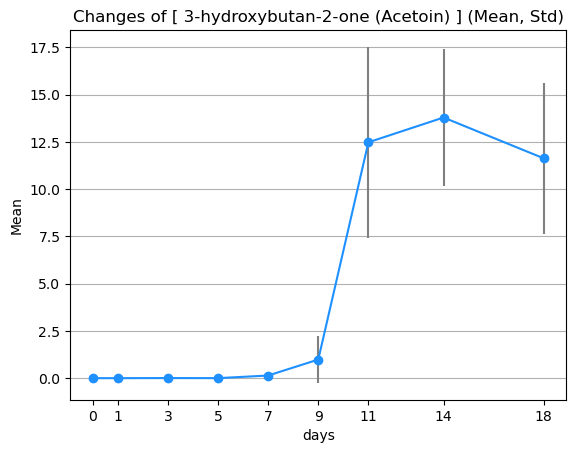

In [63]:
three_hydroxybutan_2_one_Acetoin_df = VM_meanstd('3-hydroxybutan-2-one (Acetoin)')

In [ ]:
def eda_single_numeric(var, df, describe=True):
    if describe:
        display(df[var].describe().to_frame().T)
    
    plt.subplot(2,1,1)
    sns.histplot(df[var])
    
    plt.subplot(2,1,2)
    sns.boxplot(x=var, data=df)
    plt.grid()
    plt.tight_layout()
    plt.show()

### PLS-DA

#### 1> 0이 90% 이상인 컬럼 제외한 데이터

In [25]:
data_pls1 = data.copy() # 0이 90% 이상인 컬럼 제거
data_pls1 = data_pls1.replace(0, np.nan)
drop_cols = []
for c in data_pls1.columns:
    x = data_pls1[c].isna().sum()
    zratio = x / data.shape[0] # 0 개수 / 270
    
    if zratio >= 0.9:
        drop_cols.append(c)

print(len(drop_cols))
print(drop_cols[:5])

106
['(E)-oct-2-ene', '2-Methylfuran', 'Nonane', '2,5-Dimethylfuran', 'Cyclopentanol']


In [26]:
data_pls1 = data_pls1.drop(columns=drop_cols, axis=1)
data_pls1 = data_pls1.replace(np.nan, 0)
data_pls1.shape

(270, 86)

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [31]:
def my_preprocessing(temp_data, target, random_state_=42):
    X = temp_data.drop(columns=target, axis=1)
    X = X.replace(np.nan, 0)
    Y = temp_data.loc[:, target].astype(int)
    Y = pd.get_dummies(Y, dtype=int)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state_, stratify=Y)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    y_test_argmax = y_test.values.argmax(axis=1)

    return x_train, x_test, y_train, y_test_argmax, X, Y

In [32]:
def my_PLS_DA(X_train, X_test, Y_train, Y_test, n_components_=2):
    pls = PLSRegression(n_components=n_components_)
    pls.fit(X_train, Y_train)

    y_pred = pls.predict(X_test)
    y_pred_flatten = [x.argmax() for x in y_pred]

    return pls, y_pred_flatten, Y_test

In [33]:
def plsda_result(y_test, y_pred):
    print("Accuracy :", np.round(accuracy_score(y_test, y_pred), 4))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

#### PLS-VIP 계산

In [34]:
# PLS 모델로부터 VIP 점수를 계산하는 함수 정의
def calculate_vip(pls_model, is_binary_class):
    T = pls_model.x_scores_      # X score 행렬 (샘플별 컴포넌트), 샘플 수 x 컴포넌트 수
    W = pls_model.x_weights_     # X weight 행렬 (X의 feature가 컴포넌트를 만드는데 기여한 정도) 특성 수 x 컴포넌트 수
    Q = pls_model.y_loadings_    # Y 로딩 행렬 (컴포넌트가 Y를 설명하는데 얼마나 기여하는가) Y 변수 수 x 컴포넌트 수

    p, h = W.shape                # p: X feature 수, h: 컴포넌트 수

    # 컴포넌트별 설명된 분산(SS)을 계산
    if is_binary_class:
        # 이진 분류 이하
        SS = np.sum((T ** 2) @ (Q.T ** 2), axis=0)
    else:
        # 다중 분류, 계산 방식은 행렬곱과 원소곱의 차이
        SS = np.zeros(h)
        for component_idx in range(h):
            for class_idx in range(Q.shape[0]):
                SS[component_idx] += np.sum((T[:, component_idx] ** 2) * (Q[class_idx, component_idx] ** 2))

    vip_scores = np.zeros(p)     # VIP 점수 저장 배열 초기화
    for i in range(p):           # 각 특성에 대해 반복
        weight = np.array([(W[i, j] ** 2) / np.sum(W[:, j] ** 2) for j in range(h)])  # 특성별 중요도 비율 계산
        vip_scores[i] = np.sqrt(p * np.sum(SS * weight) / np.sum(SS))                 # VIP 점수 계산
        
    return vip_scores

def pls_vip_df(vip_score, columns, imp=1.0):
    vip_df = pd.DataFrame({
        'Feature': columns,
        'VIP Score': vip_score
    })

    # 중요한 피처 선택 (VIP Score >= 1.0)
    vip_df = vip_df.loc[vip_df['VIP Score'] >= imp].sort_values(by='VIP Score', ascending=False, ignore_index=True)

    return vip_df

In [5]:
a = np.array([[1, 0],
              [0, 2],
              [1, 1]])
b = np.array([[-1, 1],
              [3, 2]])

print(a @ b)
np.sum(a @ b, axis=0)

[[-1  1]
 [ 6  4]
 [ 2  3]]


array([7, 8])

In [32]:
# pls_model, y_pred, y_test_am = my_PLS_DA(*my_preprocessing(tdata2, 'days'))
x_train, x_test, y_train, y_test, x1, y1 = my_preprocessing(data_pls1, 'days')
pls_model1, y_pred, y_test_am = my_PLS_DA(x_train, x_test, y_train, y_test)

In [33]:
plsda_result(y_test_am, y_pred)

Accuracy : 0.3889
[[0 5 0 0 1 0 0 0 0]
 [0 6 0 0 0 0 0 0 0]
 [0 2 0 0 4 0 0 0 0]
 [0 3 0 0 1 0 0 2 0]
 [0 3 0 0 3 0 0 0 0]
 [0 1 0 0 4 0 0 1 0]
 [0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 6 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.30      1.00      0.46         6
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.23      0.50      0.32         6
           5       0.00      0.00      0.00         6
           6       1.00      1.00      1.00         6
           7       0.40      1.00      0.57         6
           8       0.00      0.00      0.00         6

    accuracy                           0.39        54
   macro avg       0.21      0.39      0.26        54
weighted avg       0.21      0.39      0.26        54



c:\ProgramData\anaconda3\envs\ai_mldl\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\envs\ai_mldl\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\envs\ai_mldl\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
cv = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(pls_model1, x1, y1.values.argmax(axis=1), cv=cv)
print("평균 CV accuracy:", np.round(np.mean(scores), 4))
print("개별 CV accuracy:", np.round(scores, 4))

평균 CV accuracy: 0.6794
개별 CV accuracy: [0.6489 0.726  0.5008 0.7282 0.7932]


In [35]:
pls_vip1 = pls_vip_df(calculate_vip(pls_model1, is_binary_class=False), x1.columns)
pls_vip1.head(10)

,Feature,VIP Score
0,"Butane-2,3-dione",2.006106
1,3-hydroxybutan-2-one (Acetoin),1.954759
2,2-Methylbutanal,1.674855
3,"Heptane-2,3-dione (Acetyl valeryl)",1.651011
4,1-Octanol,1.605553
5,3-Methylbutanal,1.598653
6,Methyl 2-methylbutanoate,1.592794
7,Benzeneacetaldehyde,1.592696
8,3-Methylbutan-1-ol,1.585771
9,2-Ethylhexan-1-ol,1.576275


#### 2> 전체 데이터 (191 features)

In [36]:
data_pls2 = data.copy()

In [37]:
x_train, x_test, y_train, y_test, x2, y2, = my_preprocessing(data_pls2, 'days')
pls_model2, y_pred, y_test_am = my_PLS_DA(x_train, x_test, y_train, y_test)

In [38]:
plsda_result(y_test_am, y_pred)

Accuracy : 0.3704
[[2 0 4 0 0 0 0 0 0]
 [2 0 4 0 0 0 0 0 0]
 [1 0 1 0 1 2 1 0 0]
 [1 0 3 0 0 0 0 2 0]
 [3 0 0 0 1 2 0 0 0]
 [1 0 1 0 0 4 0 0 0]
 [0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 6 0]]
              precision    recall  f1-score   support

           0       0.20      0.33      0.25         6
           1       0.00      0.00      0.00         6
           2       0.08      0.17      0.11         6
           3       0.00      0.00      0.00         6
           4       0.50      0.17      0.25         6
           5       0.50      0.67      0.57         6
           6       0.86      1.00      0.92         6
           7       0.43      1.00      0.60         6
           8       0.00      0.00      0.00         6

    accuracy                           0.37        54
   macro avg       0.28      0.37      0.30        54
weighted avg       0.28      0.37      0.30        54



c:\ProgramData\anaconda3\envs\ai_mldl\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\envs\ai_mldl\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\envs\ai_mldl\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
cv = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(pls_model2, x2, y2.values.argmax(axis=1), cv=cv)
print("평균 CV accuracy:", np.round(np.mean(scores), 4))
print("개별 CV accuracy:", np.round(scores, 4))

평균 CV accuracy: 0.7225
개별 CV accuracy: [0.7078 0.7234 0.7314 0.8326 0.6175]


In [40]:
pls_vip2 = pls_vip_df(calculate_vip(pls_model2, is_binary_class=False), x2.columns)
pls_vip2.head(10)

,Feature,VIP Score
0,"Butane-2,3-dione",2.838313
1,3-hydroxybutan-2-one (Acetoin),2.774190
2,2-Methylbutanal,2.375230
3,"Heptane-2,3-dione (Acetyl valeryl)",2.316249
4,3-Methylbutanal,2.269842
5,Methyl 2-methylbutanoate,2.256176
6,3-Methylbutan-1-ol,2.241322
7,Benzeneacetaldehyde,2.199481
8,Methyl isovalerate,2.198390
9,1-Octanol,2.194495


#### 3> 0-9일차 vs 11-18일차

In [8]:
data_pls3 = data.copy()
data_pls3['new_group1'] = np.where(data_pls3['days'] < 10, 0, 1)
data_pls3 = data_pls3.drop(columns=['days'], axis=1)
data_pls3['new_group1'].value_counts()

new_group1
0    180
1     90
Name: count, dtype: int64

In [42]:
x_train, x_test, y_train, y_test, x3, y3 = my_preprocessing(data_pls3, 'new_group1')
pls_model3, y_pred, y_test_am = my_PLS_DA(x_train, x_test, y_train, y_test)

plsda_result(y_test_am, y_pred)

Accuracy : 1.0
[[36  0]
 [ 0 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        18

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [43]:
cv = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(pls_model3, x3, y3.values.argmax(axis=1), cv=cv)
print("평균 CV accuracy:", np.round(np.mean(scores), 4))
print("개별 CV accuracy:", np.round(scores, 4))

평균 CV accuracy: 0.764
개별 CV accuracy: [0.8655 0.8412 0.5511 0.7643 0.7981]


In [44]:
pls_vip3 = pls_vip_df(calculate_vip(pls_model3, is_binary_class=True), x3.columns)
pls_vip3.head(10)

,Feature,VIP Score
0,"Butane-2,3-dione",3.161464
1,3-hydroxybutan-2-one (Acetoin),3.122862
2,2-Phenylethanol,2.569213
3,Methyl isovalerate,2.515916
4,2-Methylbutanal,2.454995
5,3-Methylbutanal,2.352535
6,3-Methylsulfanylpropan-1-ol (Methionol),2.337057
7,Benzeneacetaldehyde,2.322268
8,Acetic acid,2.305128
9,"Heptane-2,3-dione (Acetyl valeryl)",2.288813


#### 4> 0-5일차 vs 7-9일차 vs 11-18일차

In [35]:
data_pls4 = data.copy()
data_pls4.loc[data_pls4['days'] < 6, 'new_group2'] = 0
data_pls4.loc[(data_pls4['days'] > 6) & (data_pls4['days'] < 10), 'new_group2'] = 1
data_pls4.loc[data_pls4['days'] > 10, 'new_group2'] = 2
data_pls4 = data_pls4.drop(columns=['days'], axis=1)
data_pls4['new_group2'] = data_pls4['new_group2'].astype(int)
data_pls4['new_group2'].value_counts().sort_index()

new_group2
0    120
1     60
2     90
Name: count, dtype: int64

In [36]:
x_train, x_test, y_train, y_test, x4, y4 = my_preprocessing(data_pls4, 'new_group2')
pls_model4, y_pred, y_test_am = my_PLS_DA(x_train, x_test, y_train, y_test)

plsda_result(y_test_am, y_pred)

Accuracy : 0.963
[[22  2  0]
 [ 0 12  0]
 [ 0  0 18]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00        18

    accuracy                           0.96        54
   macro avg       0.95      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [37]:
cv = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(pls_model4, x4, y4.values.argmax(axis=1), cv=cv)
print("평균 CV accuracy:", np.round(np.mean(scores), 4))
print("개별 CV accuracy:", np.round(scores, 4))

평균 CV accuracy: 0.7452
개별 CV accuracy: [0.7985 0.7363 0.6684 0.8452 0.6778]


In [48]:
pls_vip4 = pls_vip_df(calculate_vip(pls_model4, is_binary_class=False), x4.columns)
pls_vip4.head(10)

,Feature,VIP Score
0,3-hydroxybutan-2-one (Acetoin),2.916283
1,"Butane-2,3-dione",2.899476
2,3-Methylbutan-1-ol,2.528714
3,3-Methylbutanal,2.480588
4,Acetic acid,2.454654
5,2-Methylbutanal,2.451754
6,Methyl 2-methylbutanoate,2.384205
7,"Heptane-2,3-dione (Acetyl valeryl)",2.352372
8,Methyl isovalerate,2.161840
9,"2,6-Dimethylheptan-4-ol",2.035522


### pls-da로 확인한 컬럼들로 anova 분석

In [ ]:
# pls_vip1.to_csv('./data/GC_Volatile_pls1.csv', index=0)
# pls_vip2.to_csv('./data/GC_Volatile_pls2.csv', index=0)
# pls_vip3.to_csv('./data/GC_Volatile_pls3.csv', index=0)
# pls_vip4.to_csv('./data/GC_Volatile_pls4.csv', index=0)

In [ ]:
# pls_vip1 = pd.read_csv('./data/pls_grouped/GC_Volatile_pls1.csv')
# pls_vip2 = pd.read_csv('./data/pls_grouped/GC_Volatile_pls2.csv')
# pls_vip3 = pd.read_csv('./data/pls_grouped/GC_Volatile_pls3.csv')
# pls_vip4 = pd.read_csv('./data/pls_grouped/GC_Volatile_pls4.csv')

In [4]:
from scipy.stats import f_oneway
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [15]:
def pls_intersect_group(pls_vip, data, group_feature, range_=10):
    pls_vip_cols= pls_vip.head(range_)['Feature'].to_list() # PLS-DA 분석에서 VIP >= 1인 Feature 상위 10개
    pls_anova_sig = {} # 상위 10개 Feature 중에서도 일원분산분석에서 유의한 컬럼과 Tukey 사후검정 결과 데이터프레임

    for col in pls_vip_cols:
        anova = data[[col, group_feature]]
        grouped = anova.groupby(group_feature)[col].apply(list)
        _, p_value = f_oneway(*grouped) # _ : f_stat

        if p_value < 0.05:
            # pls_anova_sig1.append(col)
            # pls_anova_sig1[col] = anova

            comp = MultiComparison(anova[col], anova[group_feature])
            result = comp.tukeyhsd()
            tukey_df = pd.DataFrame(data=result._results_table.data[1:], columns=result._results_table.data[0])
            pls_anova_sig[col] = tukey_df

    # 사후 검정으로 일자 그룹간 차이가 유의한 날짜 중 상위 10개 컬럼이 공통인 날짜들
    pas_df = pd.DataFrame()
    for col in list(pls_anova_sig.keys()):
        temp = pls_anova_sig[col]
        temp_1 = temp.loc[temp['reject'] == True, ['group1', 'group2']]
        temp_1['grouped'] = temp_1['group1'].map(str) + '-' + temp_1['group2'].map(str)
        pas_df = pd.concat([pas_df, temp_1[['grouped']]], ignore_index=True, axis=1)

    intersect = set(pas_df[0].dropna().to_list())
    for i in pas_df.columns:
        intersect = intersect.intersection(set(pas_df[i].dropna().to_list()))

    intersect = sorted(list(intersect))

    return pas_df, intersect

In [ ]:
_, intersect1 = pls_intersect_group(pls_vip1, data, 'days')
print(intersect1)
_, intersect2 = pls_intersect_group(pls_vip2, data, 'days')
print(intersect2)
_, intersect3 = pls_intersect_group(pls_vip3, data_pls3, 'new_group1')
print(intersect3)
_, intersect4 = pls_intersect_group(pls_vip4, data_pls4, 'new_group2')
print(intersect4)

['0-14', '5-11', '7-11', '9-11']
['0-11', '0-14', '1-11', '3-11', '5-11', '7-11', '7-14', '9-11']
['0-1']
['0-2', '1-2']


In [16]:
ins3_df, intersect3 = pls_intersect_group(pls_vip3, data_pls3, 'new_group1', range_=10)
print(intersect3)
ins4_df, intersect4 = pls_intersect_group(pls_vip4, data_pls4, 'new_group2', range_=10)
print(intersect4)

['0-1']
['0-2', '1-2']


In [26]:
group_feature = 'new_group2'
pls_vip_cols= pls_vip4.head(10)['Feature'].to_list() # PLS-DA 분석에서 VIP >= 1인 Feature 상위 10개
pls_anova_sig = {} # 상위 10개 Feature 중에서도 일원분산분석에서 유의한 컬럼과 Tukey 사후검정 결과 데이터프레임

for col in pls_vip_cols:
    anova = data_pls4[[col, group_feature]]
    grouped = anova.groupby(group_feature)[col].apply(list)
    _, p_value = f_oneway(*grouped) # _ : f_stat

    if p_value < 0.05:
        # pls_anova_sig1.append(col)
        # pls_anova_sig1[col] = anova

        comp = MultiComparison(anova[col], anova[group_feature])
        result = comp.tukeyhsd()
        tukey_df = pd.DataFrame(data=result._results_table.data[1:], columns=result._results_table.data[0])
        pls_anova_sig[col] = tukey_df

# 사후 검정으로 일자 그룹간 차이가 유의한 날짜 중 상위 10개 컬럼이 공통인 날짜들
pas_df = pd.DataFrame()
for col in list(pls_anova_sig.keys()):
    temp = pls_anova_sig[col]
    temp_1 = temp.loc[temp['reject'] == True, ['group1', 'group2']]
    temp_1['grouped'] = temp_1['group1'].map(str) + '-' + temp_1['group2'].map(str)
    display(temp)
    pas_df = pd.concat([pas_df, temp_1[['grouped']]], ignore_index=True, axis=1)

intersect = set(pas_df[0].dropna().to_list())
for i in pas_df.columns:
    intersect = intersect.intersection(set(pas_df[i].dropna().to_list()))

intersect = sorted(list(intersect))
intersect

,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,0.5599,0.3436,-0.3843,1.5041,False
1,0,2,12.6284,0.0000,11.7957,13.4611,True
2,1,2,12.0685,0.0000,11.0733,13.0638,True


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,0.2132,0.1219,-0.0420,0.4683,False
1,0,2,3.1589,0.0000,2.9339,3.3839,True
2,1,2,2.9458,0.0000,2.6768,3.2147,True


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,0.0341,0.9938,-0.7244,0.7925,False
1,0,2,5.5368,0.0000,4.8679,6.2057,True
2,1,2,5.5027,0.0000,4.7032,6.3022,True


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,0.0208,0.9014,-0.0921,0.1336,False
1,0,2,0.7947,0.0000,0.6951,0.8942,True
2,1,2,0.7739,0.0000,0.6549,0.8929,True


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,-0.0003,1.0,-0.0984,0.0979,False
1,0,2,0.5714,0.0,0.4848,0.6579,True
2,1,2,0.5716,0.0,0.4682,0.6751,True


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,0.0005,0.9988,-0.0244,0.0254,False
1,0,2,0.1650,0.0000,0.1430,0.1870,True
2,1,2,0.1645,0.0000,0.1382,0.1908,True


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,0.0106,0.8873,-0.0430,0.0642,False
1,0,2,0.3472,0.0000,0.2999,0.3945,True
2,1,2,0.3366,0.0000,0.2801,0.3931,True


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,0.0037,0.8791,-0.0144,0.0219,False
1,0,2,0.1188,0.0000,0.1028,0.1348,True
2,1,2,0.1150,0.0000,0.0959,0.1342,True


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,-0.0009,0.9975,-0.0313,0.0295,False
1,0,2,0.1513,0.0000,0.1245,0.1781,True
2,1,2,0.1522,0.0000,0.1202,0.1842,True


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,0.0015,0.9899,-0.0250,0.0280,False
1,0,2,0.1287,0.0000,0.1054,0.1521,True
2,1,2,0.1272,0.0000,0.0993,0.1551,True


['0-2', '1-2']

In [27]:
pas_df

,0,1,2,3,4,5,6,7,8,9
1,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2
2,1-2,1-2,1-2,1-2,1-2,1-2,1-2,1-2,1-2,1-2


In [53]:
pls_vip_cols1 = pls_vip1.head(10)['Feature'].to_list() # PLS-DA 분석에서 VIP >= 1인 Feature 상위 10개
pls_anova_sig1 = {} # 상위 10개 Feature 중에서도 일원분산분석에서 유의한 컬럼과 Tukey 사후검정 결과 데이터프레임

for col in pls_vip_cols1:
    anova = data[[col, 'days']]
    grouped = anova.groupby('days')[col].apply(list)
    f_stat, p_value = f_oneway(*grouped)

    if p_value < 0.05:
        # pls_anova_sig1.append(col)
        # pls_anova_sig1[col] = anova

        comp = MultiComparison(anova[col], anova['days'])
        result = comp.tukeyhsd()
        tukey_df = pd.DataFrame(data=result._results_table.data[1:], columns=result._results_table.data[0])
        # tukey_df.loc[tukey_df['reject'] == True]
        pls_anova_sig1[col] = tukey_df

In [ ]:
# 사후 검정으로 일자 그룹간 차이가 유의한 날짜 중 상위 10개 컬럼이 공통인 날짜들
pas1_df = pd.DataFrame()
for col in list(pls_anova_sig1.keys()):
    temp1 = pls_anova_sig1[col]
    temp1_1 = temp1.loc[temp1['reject'] == True, ['group1', 'group2']]
    temp1_1['grouped'] = temp1_1['group1'].map(str) + '-' + temp1_1['group2'].map(str)
    pas1_df = pd.concat([pas1_df, temp1_1[['grouped']]], ignore_index=True, axis=1)

intersect1 = set(pas1_df[0].dropna().to_list())
for i in pas1_df.columns:
    intersect1 = intersect1.intersection(set(pas1_df[i].dropna().to_list()))

intersect1 = sorted(list(intersect1))
intersect1

,0,1,2,3,4,5,6,7,8,9
5,0-11,0-11,0-11,0-11,0-11,0-11,0-11,0-11,0-11,NaN
6,0-14,0-14,0-14,0-14,0-14,0-14,0-14,0-14,0-14,0-14
7,0-18,0-18,0-18,0-18,0-18,0-18,0-18,NaN,0-18,0-18
12,1-11,1-11,1-11,1-11,1-11,1-11,1-11,1-11,1-11,NaN
13,1-14,1-14,1-14,1-14,NaN,1-14,1-14,1-14,1-14,1-14


In [99]:
intersect1 = set(pas1_df[0].dropna().to_list())
for i in pas1_df.columns:
    intersect1 = intersect1.intersection(set(pas1_df[i].dropna().to_list()))

intersect1 = sorted(list(intersect1))
intersect1

['0-14', '5-11', '7-11', '9-11']

In [78]:
def draw_grouped(intersect, x_ticks_=range(0, 19)):
    parsed_ranges = [tuple(map(int, r.split('-'))) for r in intersect]
    lengths = [end - start for start, end in parsed_ranges]

    sorted_indices = sorted(range(len(parsed_ranges)), key=lambda i: lengths[i])
    sorted_ranges = [parsed_ranges[i] for i in sorted_indices]
    sorted_labels = [intersect[i] for i in sorted_indices]

    original_xticks = x_ticks_
    mapped_x = {v: i for i, v in enumerate(original_xticks)}

    plt.figure(figsize=(6, 4))
    y_step = 0.5  # y 간격 줄이기

    for i, (start, end) in enumerate(sorted_ranges):
        y_pos = i * y_step
        plt.hlines(y=y_pos, xmin=mapped_x[start], xmax=mapped_x[end], linewidth=2)
        plt.text((mapped_x[start] + mapped_x[end]) / 2, y_pos + 0.15, f"{start}-{end}", ha='center', fontsize=10)

    plt.yticks([i * y_step for i in range(len(sorted_ranges))],
            [f"{end - start}" for (start, end) in sorted_ranges])

    plt.xticks(ticks=range(len(original_xticks)), labels=original_xticks)

    plt.xlabel("Days")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

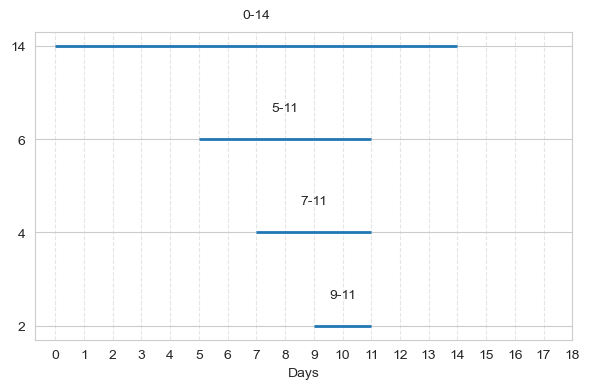

In [79]:
draw_grouped(intersect1)

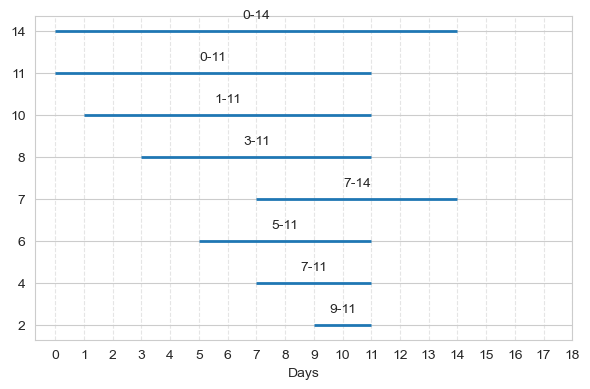

In [80]:
draw_grouped(intersect2)

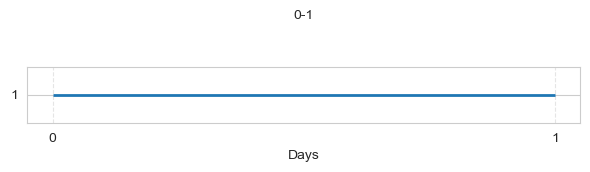

In [85]:
draw_grouped(intersect3, x_ticks_=range(0, 2))

In [86]:
ins3_df

,0,1,2,3,4,5,6,7,8,9
0,0-1,0-1,0-1,0-1,0-1,0-1,0-1,0-1,0-1,0-1


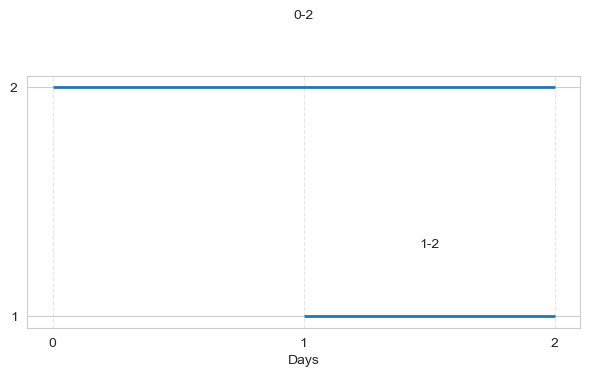

In [82]:
draw_grouped(intersect4, x_ticks_=range(0, 3))

### pls-vip 1~4 많이 나온 compound 평균과 분산 변화 확인

In [52]:
# 각 Feature에 대해 index 위치 기록
rank1 = pls_vip1.reset_index().set_index("Feature")["index"]
rank2 = pls_vip2.reset_index().set_index("Feature")["index"]
rank3 = pls_vip3.reset_index().set_index("Feature")["index"]
rank4 = pls_vip4.reset_index().set_index("Feature")["index"]

# 모든 Feature의 합집합
all_features = set(rank1.index).union(set(rank2.index)).union(set(rank3.index)).union(set(rank4.index))

# 인덱스 합 계산 (없으면 큰 값으로 간주, 예: 1000)
combined = []
for feature in all_features:
    i1 = rank1.get(feature, 1000)
    i2 = rank2.get(feature, 1000)
    i3 = rank3.get(feature, 1000)
    i4 = rank4.get(feature, 1000)
    combined.append((feature, i1 + i2 + i3 + i4))

# 정렬 후 DataFrame 반환
combined_df = pd.DataFrame(combined, columns=["Feature", "IndexSum"])
combined_df = combined_df.sort_values("IndexSum").reset_index(drop=True)
combined_df = combined_df.loc[combined_df['IndexSum'] < 1000]
combined_df["Rank"] = combined_df.index


In [53]:
combined_df

,Feature,IndexSum,Rank
0,"Butane-2,3-dione",1,0
1,3-hydroxybutan-2-one (Acetoin),3,1
2,2-Methylbutanal,13,2
3,3-Methylbutanal,17,3
4,"Heptane-2,3-dione (Acetyl valeryl)",22,4
5,3-Methylbutan-1-ol,26,5
6,Methyl isovalerate,29,6
7,Methyl 2-methylbutanoate,30,7
8,Benzeneacetaldehyde,35,8
9,Acetic acid,44,9


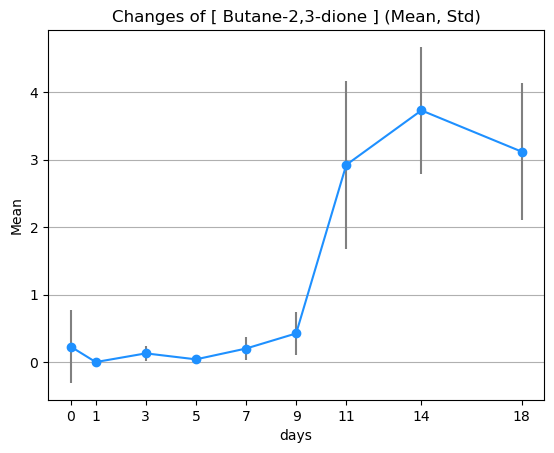

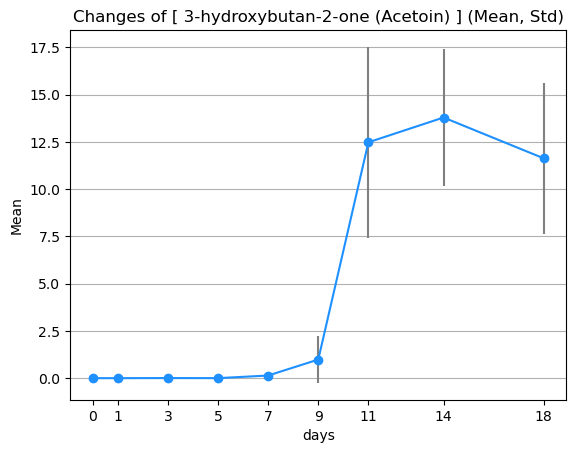

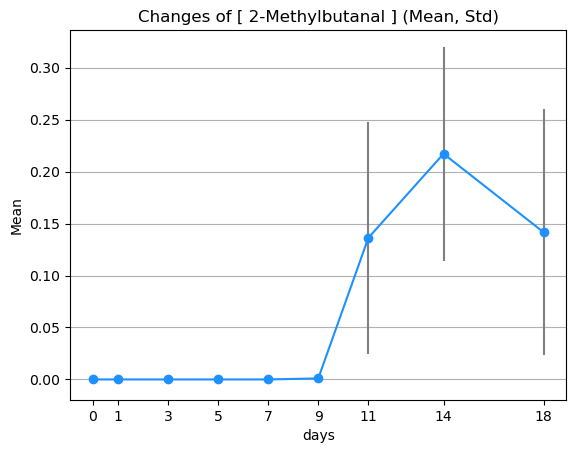

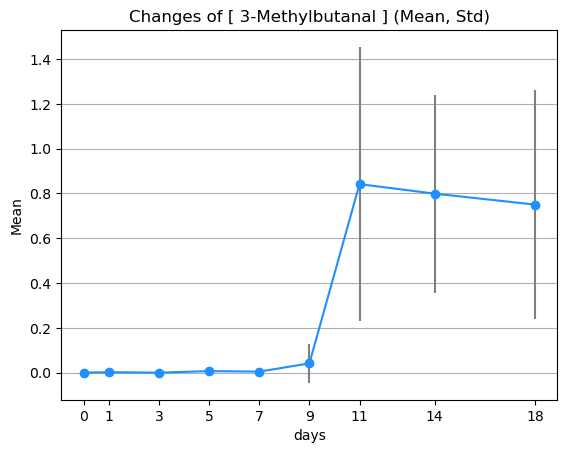

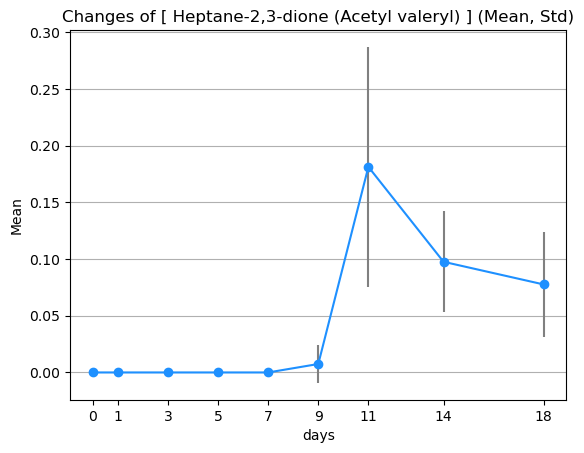

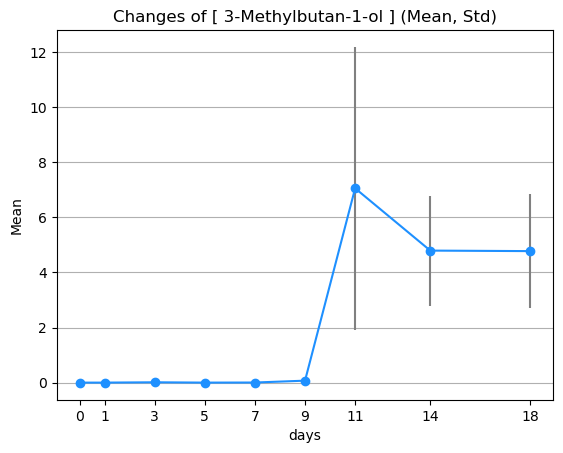

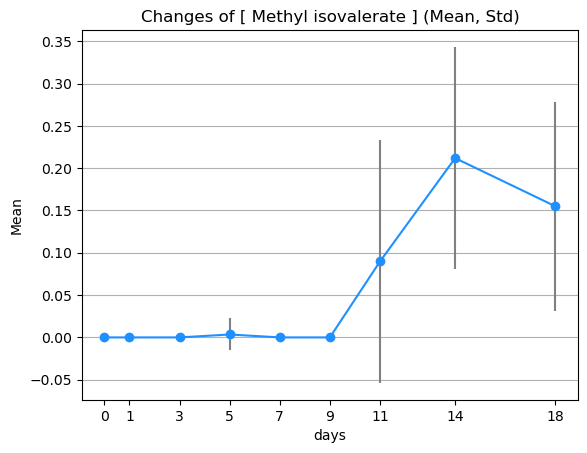

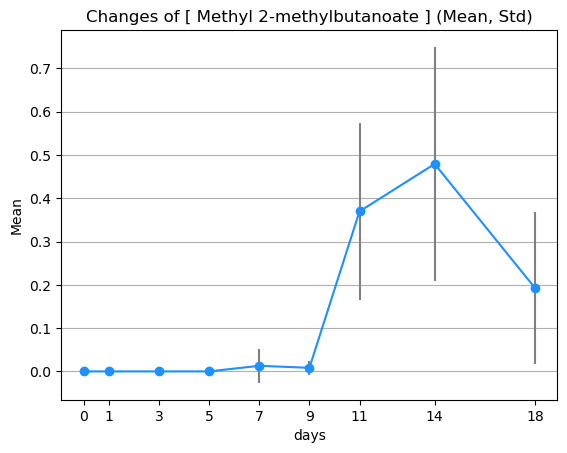

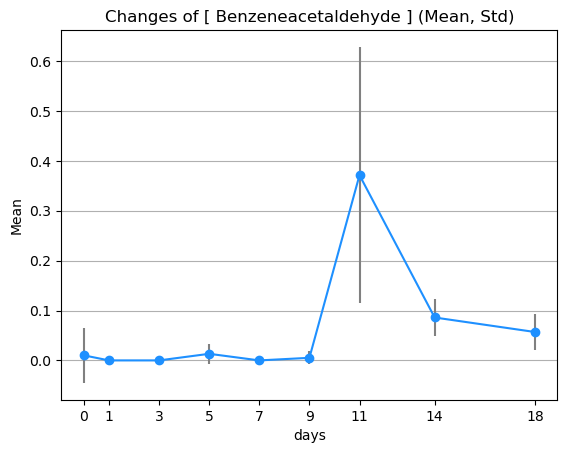

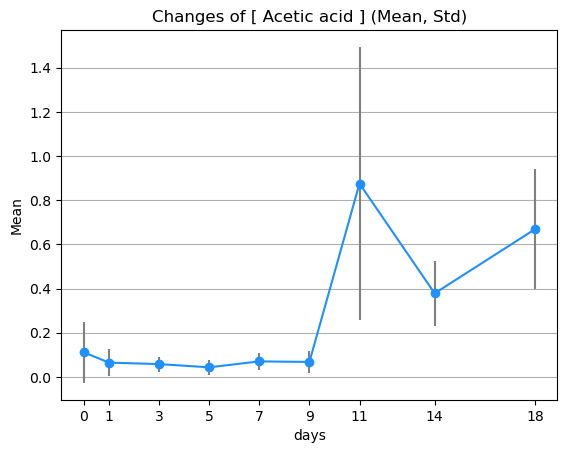

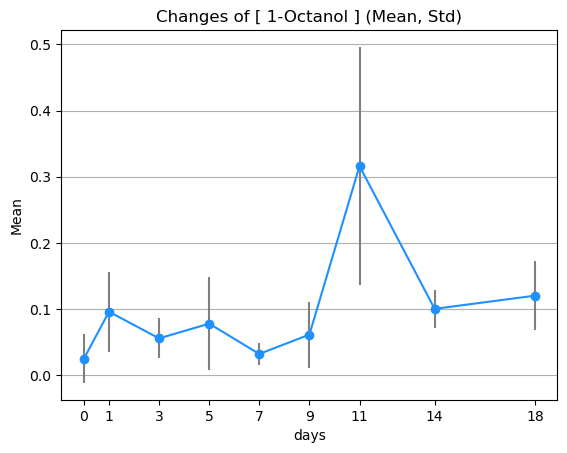

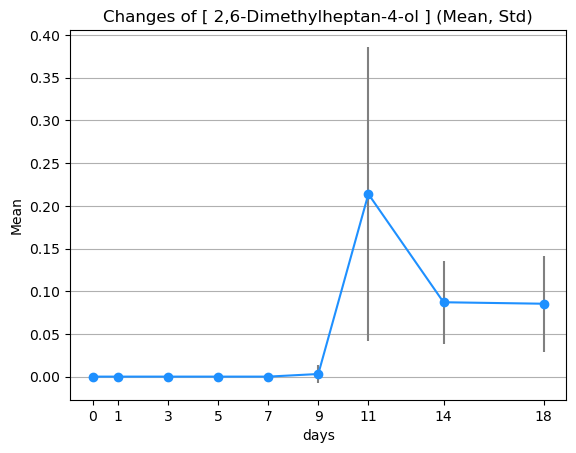

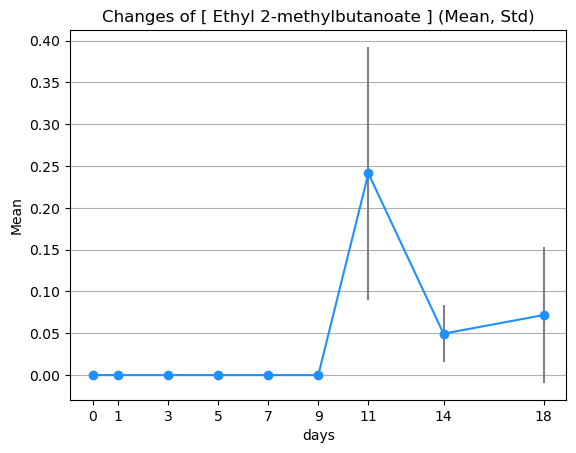

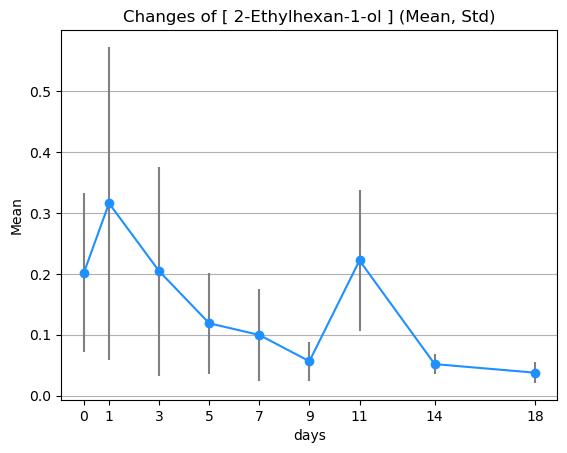

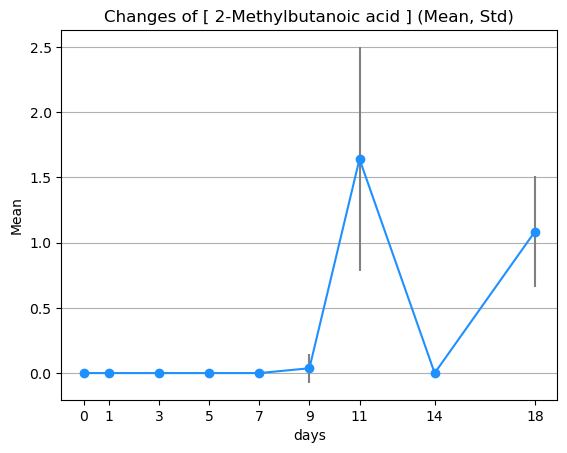

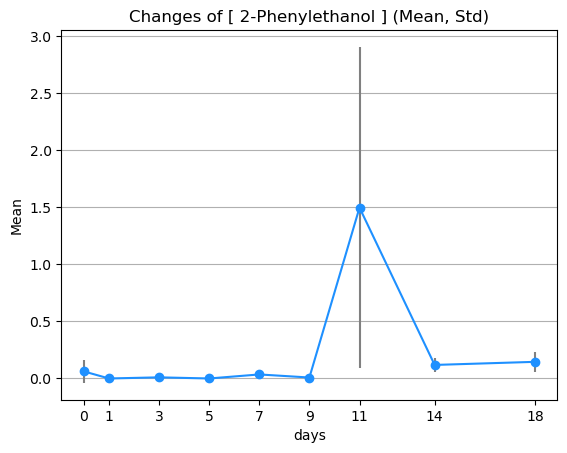

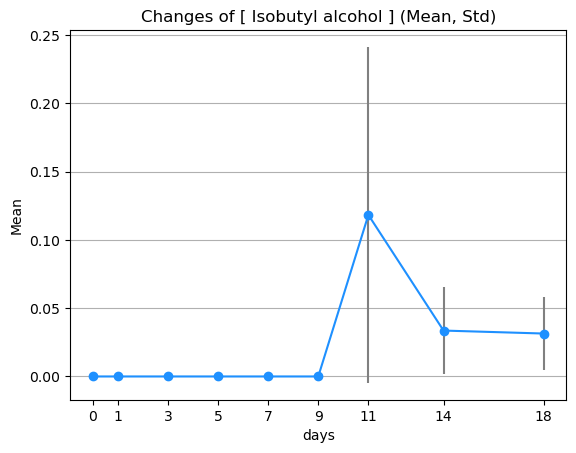

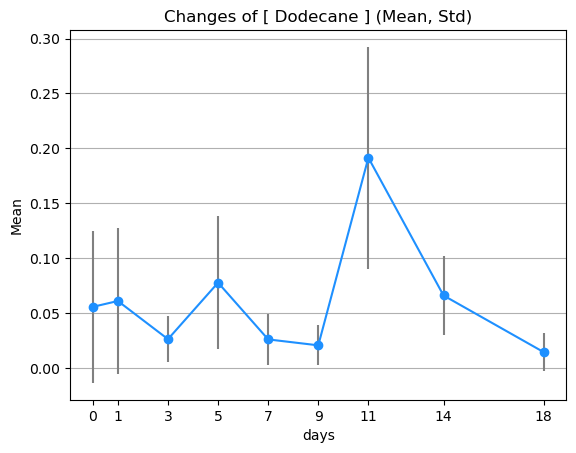

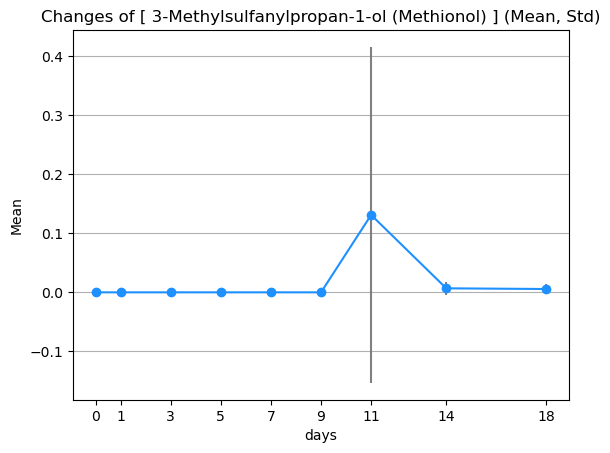

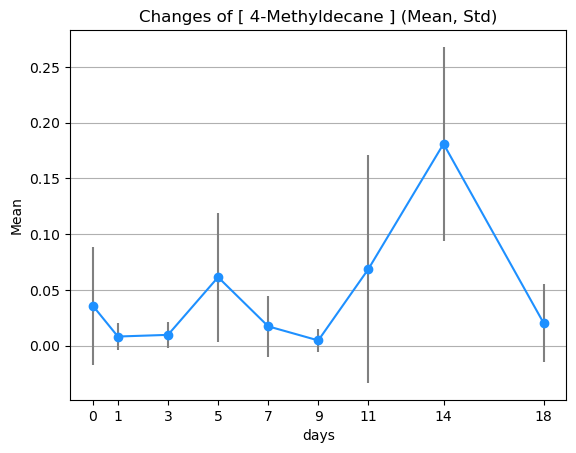

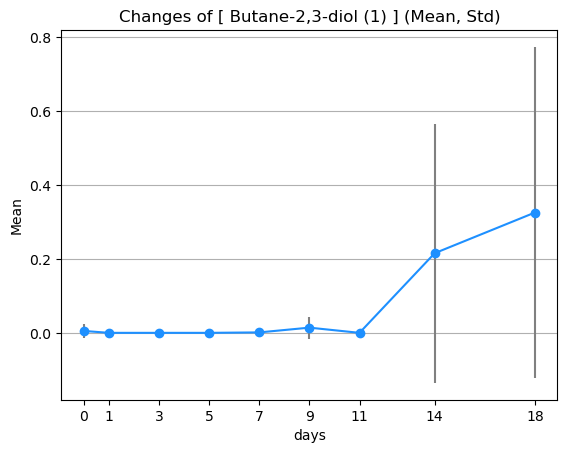

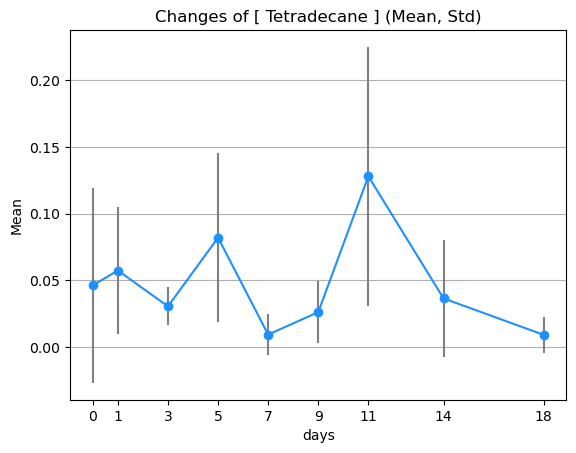

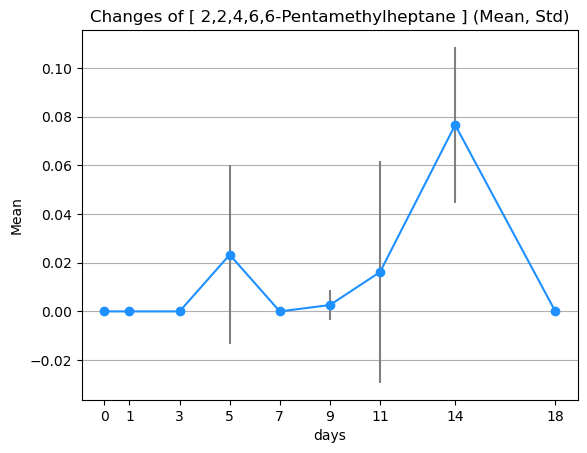

In [64]:
for col in combined_df['Feature']:
    VM_meanstd(col)